In [1]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel(r'C:\Users\Nandakishore\Desktop\supplychain dataset.xlsx')
data = pd.read_excel(r'C:\Users\Nandakishore\Desktop\supplychain dataset.xlsx')

In [3]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
df.shape

(22150, 24)

In [5]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [6]:
df.duplicated().any()

False

In [7]:
df.dropna(thresh=2,inplace=True)#to drop raws of having only one column filled.

In [8]:
df.describe(include='all')

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150,22150,22150,22150,22150,22150,22150.000000,22150.000000,22150.000000,22150.000000,...,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,21345,22150.000000,22150.000000,22150.000000
unique,22150,22150,2,3,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,WH_100000,EID_50000,Rural,Large,North,Zone 6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,1,1,20334,8968,9069,7376,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4859,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.097020,0.777201,3.103928,4983.115711,...,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,NaN,3.487765,18.767765,22086.780813
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606289,1.201747,1.142886,1050.634225,...,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,NaN,1.691661,8.644778,11626.192340
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1821.000000,...,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,NaN,0.000000,1.000000,2065.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,4309.250000,...,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,NaN,2.000000,11.000000,12151.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,4859.000000,...,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,NaN,3.000000,20.000000,22099.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,5499.000000,...,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,NaN,5.000000,26.000000,30102.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [10]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']#to find catagorical features.
cat_features

['Ware_house_ID',
 'WH_Manager_ID',
 'Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [11]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [12]:
pd.DataFrame(df.isnull().mean().sort_values(ascending=False)*100, columns=['% Missing'])

,% Missing
wh_est_year,47.607223
workers_num,3.959368
approved_wh_govt_certificate,3.634312
Ware_house_ID,0.000000
WH_Manager_ID,0.000000
govt_check_l3m,0.000000
wh_breakdown_l3m,0.000000
temp_reg_mach,0.000000
storage_issue_reported_l3m,0.000000
dist_from_hub,0.000000


In [13]:
df.corr()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.020336,0.008104,-0.001776,0.005063,-0.014583,-0.004816,-0.007217,-0.000611,-0.013751,0.012628,-0.007719,0.263539,0.000704,-0.006470,0.000676
transport_issue_l1y,0.020336,1.000000,-0.008288,0.001391,0.005509,-0.006671,0.003131,-0.007378,0.013864,-0.009625,-0.013837,-0.145914,0.012757,0.011795,0.006058,-0.175746
Competitor_in_mkt,0.008104,-0.008288,1.000000,-0.154848,0.000886,0.008982,-0.004428,-0.000688,0.010358,-0.004387,-0.012101,0.007654,0.011397,0.012544,-0.043094,0.007282
retail_shop_num,-0.001776,0.001391,-0.154848,1.000000,-0.004396,-0.005321,0.004502,-0.006812,0.001983,-0.007281,0.007627,-0.007045,-0.000464,-0.005694,0.043557,-0.006785
distributor_num,0.005063,0.005509,0.000886,-0.004396,1.000000,0.008004,-0.006096,-0.000763,-0.007538,-0.014371,-0.015375,0.003314,0.004048,0.001885,-0.005996,0.005143
flood_impacted,-0.014583,-0.006671,0.008982,-0.005321,0.008004,1.000000,0.106622,0.167565,0.005620,0.166148,0.002122,-0.006221,-0.011838,-0.000023,-0.001179,-0.005055
flood_proof,-0.004816,0.003131,-0.004428,0.004502,-0.006096,0.106622,1.000000,0.115616,-0.003186,0.041031,-0.001866,-0.005069,0.004251,-0.007964,-0.007171,-0.003567
electric_supply,-0.007217,-0.007378,-0.000688,-0.006812,-0.000763,0.167565,0.115616,1.000000,-0.002138,0.341788,-0.006766,-0.000821,-0.006324,-0.012428,-0.007258,-0.000725
dist_from_hub,-0.000611,0.013864,0.010358,0.001983,-0.007538,0.005620,-0.003186,-0.002138,1.000000,-0.015183,0.009228,-0.006531,0.000175,0.001300,0.002769,-0.006040
workers_num,-0.013751,-0.009625,-0.004387,-0.007281,-0.014371,0.166148,0.041031,0.341788,-0.015183,1.000000,0.006868,-0.008788,0.000717,-0.020225,-0.004913,-0.007800


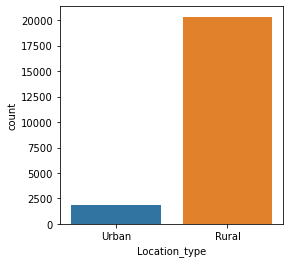

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x='Location_type',data=df)
plt.show()

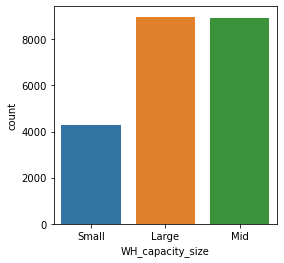

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x='WH_capacity_size',data=df)
plt.show()

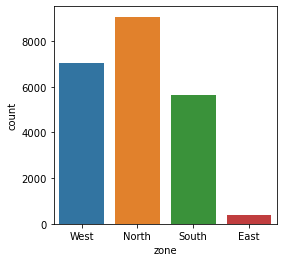

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(x='zone',data=df)
plt.show()

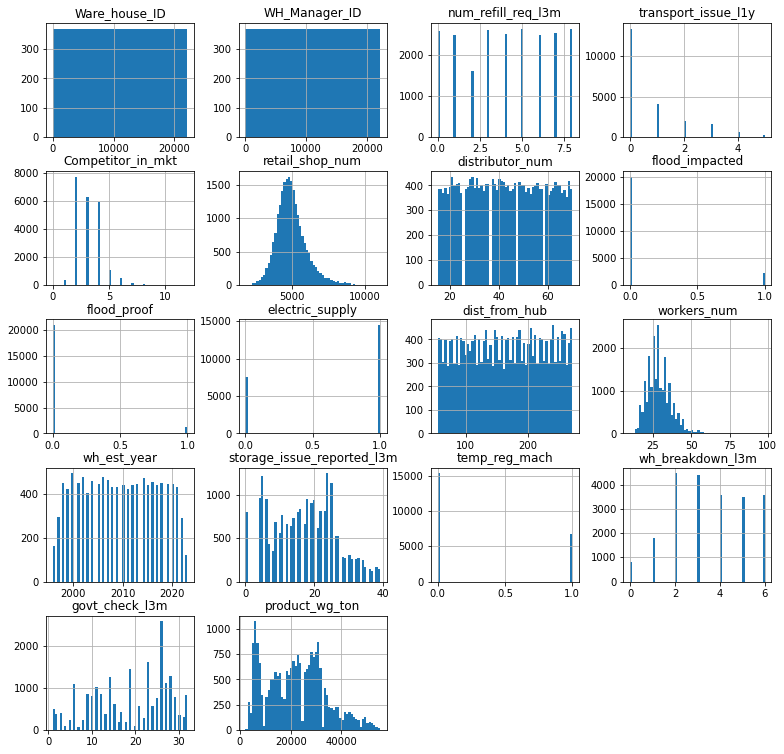

In [90]:
df.hist(figsize=(13,13), bins=60);

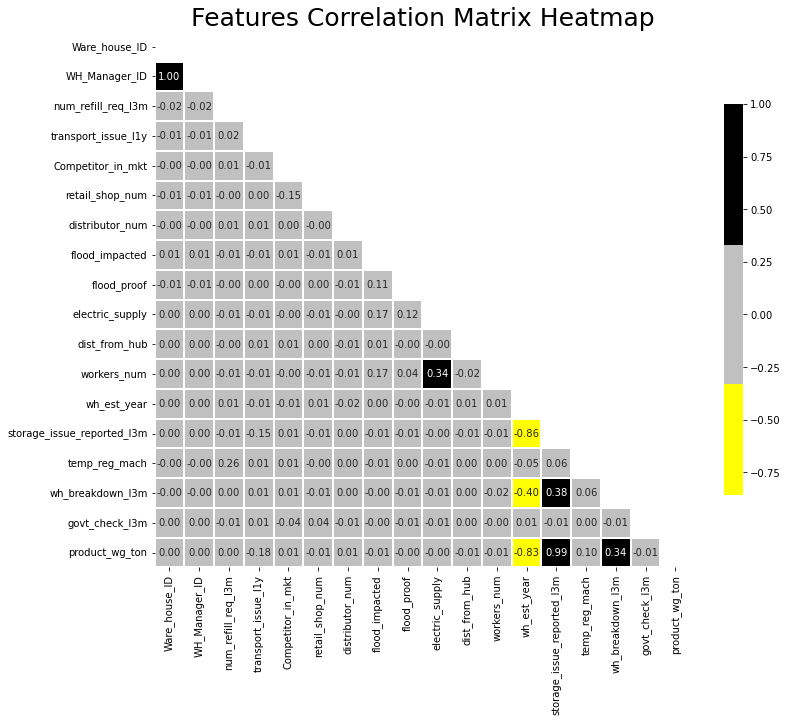

In [92]:
#Plot Matrix of Correlation
plt.figure(figsize=(12,12))

heatmap_colors = ['yellow', 'silver', 'black']

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(df.corr(), 
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=heatmap_colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

plt.title('Features Correlation Matrix Heatmap', fontsize=25);

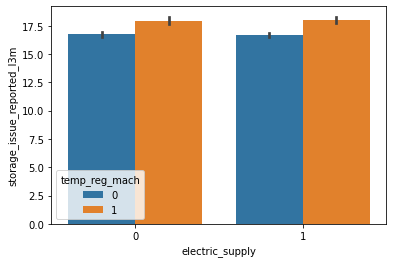

In [17]:
sns.barplot(x = 'electric_supply',y = 'storage_issue_reported_l3m',hue='temp_reg_mach',data = df)
plt.show()

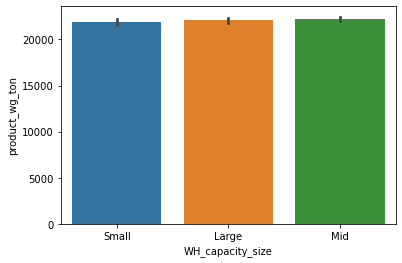

In [18]:
sns.barplot(x = 'WH_capacity_size',y = 'product_wg_ton',data = df)
plt.show()

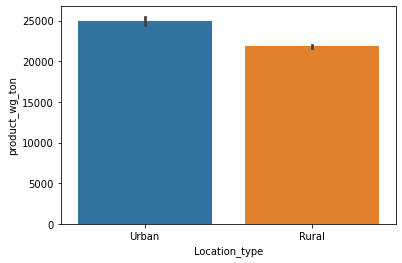

In [19]:
sns.barplot(x = 'Location_type',y = 'product_wg_ton',data = df)
plt.show()

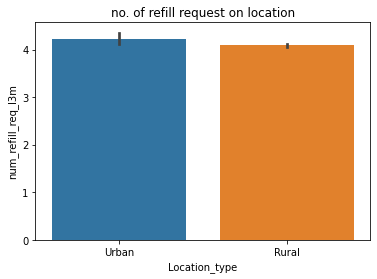

In [20]:
sns.barplot(x = 'Location_type',y = 'num_refill_req_l3m',data = df)
plt.title('no. of refill request on location')
plt.show()

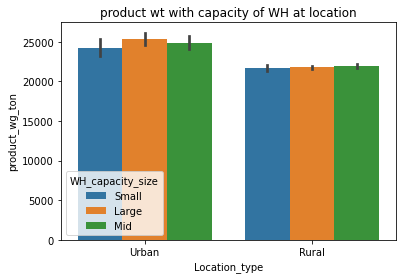

In [21]:
sns.barplot(x = 'Location_type',y = 'product_wg_ton',hue='WH_capacity_size',data = df)
plt.title('product wt with capacity of WH at location')
plt.show()

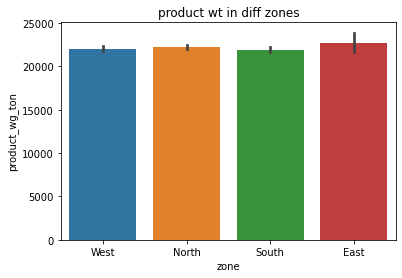

In [22]:
sns.barplot(x = 'zone',y = 'product_wg_ton',data = df)
plt.title('product wt in diff zones')
plt.show()

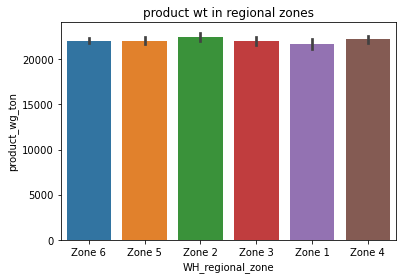

In [23]:
sns.barplot(x = 'WH_regional_zone',y = 'product_wg_ton',data = df)
plt.title('product wt in regional zones')
plt.show()

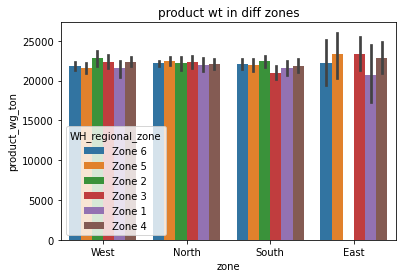

In [24]:
sns.barplot(x = 'zone',y = 'product_wg_ton',hue='WH_regional_zone',data = df)
plt.title('product wt in diff zones')
plt.show()

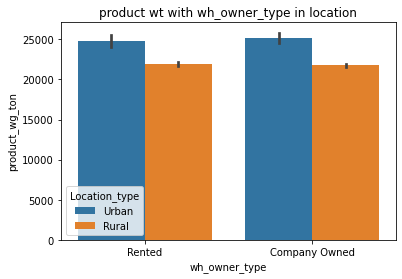

In [25]:
sns.barplot(x = 'wh_owner_type',y = 'product_wg_ton',hue='Location_type',data = df)
plt.title('product wt with wh_owner_type in location')
plt.show()


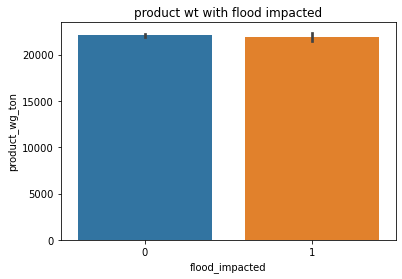

In [26]:
sns.barplot(x = 'flood_impacted',y = 'product_wg_ton',data = df)
plt.title('product wt with flood impacted')
plt.show()

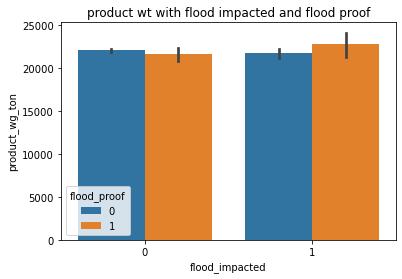

In [27]:
sns.barplot(x = 'flood_impacted',y = 'product_wg_ton',hue='flood_proof',data = df)
plt.title('product wt with flood impacted and flood proof')
plt.show()

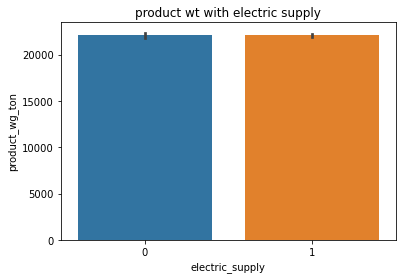

In [28]:
sns.barplot(x = 'electric_supply',y = 'product_wg_ton',data = df)
plt.title('product wt with electric supply')
plt.show()

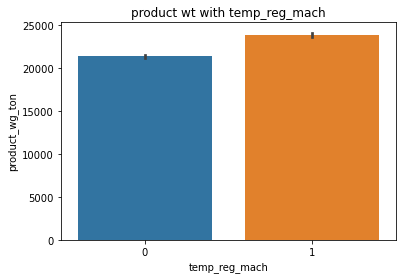

In [29]:
sns.barplot(x = 'temp_reg_mach',y = 'product_wg_ton',data = df)
plt.title('product wt with temp_reg_mach')
plt.show()

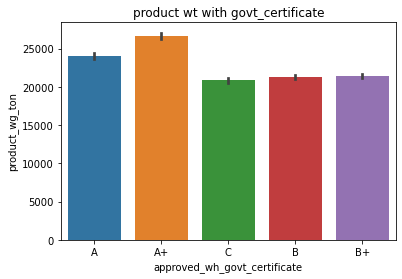

In [30]:
sns.barplot(x = 'approved_wh_govt_certificate',y = 'product_wg_ton',data = df)
plt.title('product wt with govt_certificate')
plt.show()

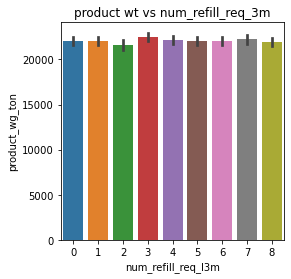

In [35]:
plt.figure(figsize=(4,4))
sns.barplot(x='num_refill_req_l3m',y='product_wg_ton', data=df)
plt.title('product wt vs num_refill_req_3m')
plt.show()

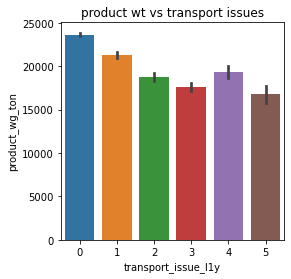

In [36]:
plt.figure(figsize=(4,4))
sns.barplot(x='transport_issue_l1y',y='product_wg_ton', data=df)
plt.title('product wt vs transport issues')
plt.show()

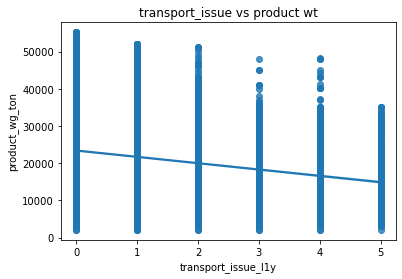

In [38]:
sns.regplot(x = df['transport_issue_l1y'],
            y = df['product_wg_ton'],
            data = df)
plt.title('transport_issue vs product wt')
plt.show()

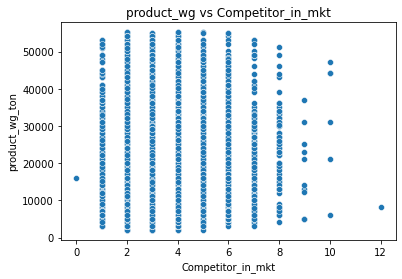

In [39]:
sns.scatterplot(x = df["Competitor_in_mkt"] , y = df["product_wg_ton"])
plt.title('product_wg vs Competitor_in_mkt')
plt.show()

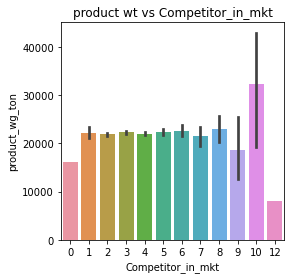

In [40]:
plt.figure(figsize=(4,4))
sns.barplot(x='Competitor_in_mkt',y='product_wg_ton', data=df)
plt.title('product wt vs Competitor_in_mkt')
plt.show()

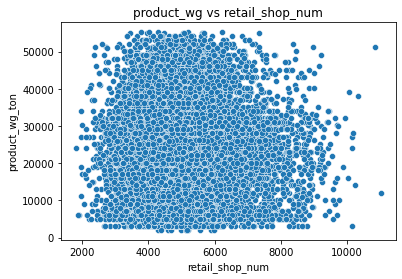

In [41]:
sns.scatterplot(x = df["retail_shop_num"] , y = df["product_wg_ton"])
plt.title('product_wg vs retail_shop_num')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
sns.lineplot(x=df['retail_shop_num'],y=df['product_wg_ton'],label='product wt on retailers',color='r',ci=15)
plt.ylabel('product_wg_ton')
plt.xlabel('no of retailers')
plt.title('product_wg vs no of retailers')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
sns.lineplot(x=df['distributor_num'],y=df['product_wg_ton'],label='product wt on retailers',color='r',ci=15)
plt.ylabel('product_wg_ton')
plt.xlabel('distributor_num')
plt.title('product_wg vs distributor_num')
plt.show()

sns.scatterplot(x = df["workers_num"] , y = df["product_wg_ton"])
plt.title('product_wg vs workers_num')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
sns.lineplot(x=df['workers_num'],y=df['product_wg_ton'],label='product wt on workers',color='r',ci=15)
plt.ylabel('product_wg_ton')
plt.xlabel('workers_num')
plt.title('product_wg vs workers_num')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
sns.lineplot(x=df['dist_from_hub'],y=df['product_wg_ton'],label='product wt with distance ',color='r',ci=15)
plt.ylabel('product_wg_ton')
plt.xlabel('dist_from_hub')
plt.title('product_wg vs dist_from_hub')
plt.show()

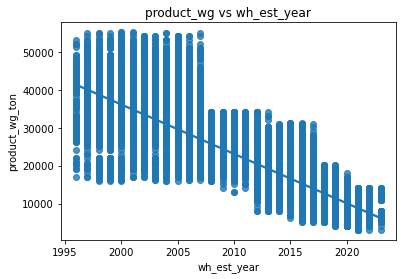

In [42]:
sns.regplot(x = df["wh_est_year"],
            y = df['product_wg_ton'],data = df)
plt.title('product_wg vs wh_est_year')
plt.show()

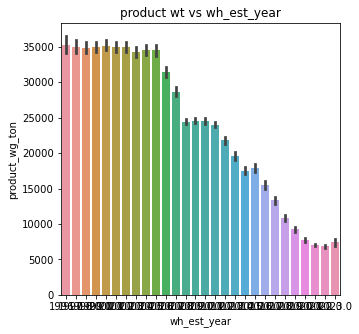

In [43]:
plt.figure(figsize=(5,5))
sns.barplot(x='wh_est_year',y='product_wg_ton', data=df)
plt.title('product wt vs wh_est_year')
plt.show()

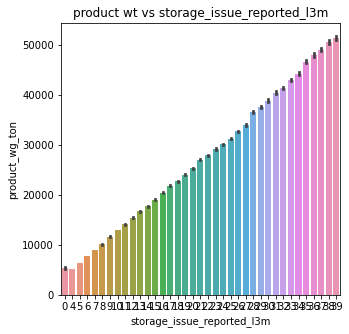

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(x='storage_issue_reported_l3m',y='product_wg_ton', data=df)
plt.title('product wt vs storage_issue_reported_l3m')
plt.show()

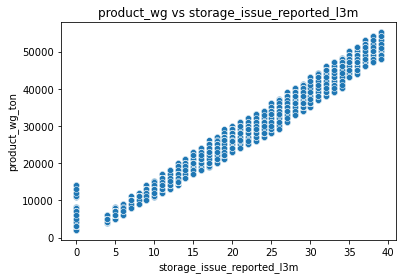

In [94]:
sns.scatterplot(x = df["storage_issue_reported_l3m"] , y = df["product_wg_ton"])
plt.title('product_wg vs storage_issue_reported_l3m')
plt.show()

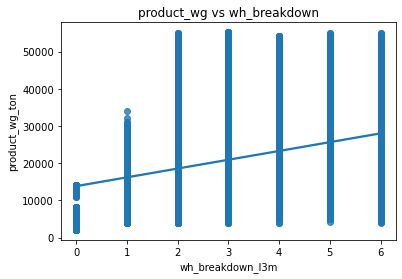

In [45]:
sns.regplot(x = df["wh_breakdown_l3m"],
            y = df['product_wg_ton'],data = df)
plt.title('product_wg vs wh_breakdown')
plt.show()

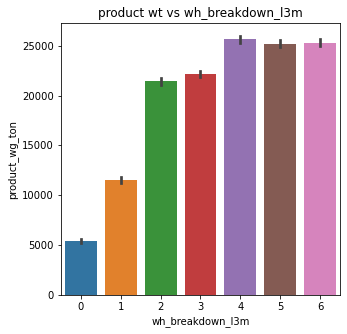

In [46]:
plt.figure(figsize=(5,5))
sns.barplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df)
plt.title('product wt vs wh_breakdown_l3m')
plt.show()

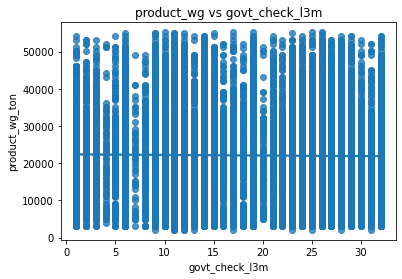

In [47]:
sns.regplot(x = df["govt_check_l3m"],
            y = df['product_wg_ton'],data = df)
plt.title('product_wg vs govt_check_l3m')
plt.show()

In [ ]:
#WE CAN ALSO TRY THE RELATION USING LINEPLOT AND SCATTER PLOTS

sns.scatterplot(x = df["Ware_house_ID"] , y = df["product_wg_ton"])
plt.title('product_wg vs workers_num')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
sns.lineplot(x=df['Ware_house_ID'],y=df['product_wg_ton'],label='product wt related to wh estimation',color='r',ci=15)
plt.ylabel('product_wg_ton')
plt.xlabel('Ware_house_ID')
plt.title('product_wg vs Ware_house_ID')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
sns.lineplot(x=df['storage_issue_reported_l3m'],y=df['product_wg_ton'],label='product wt with storage issue',color='r',ci=15)
plt.ylabel('product_wg_ton')
plt.xlabel('storage_issue_reported_l3m')
plt.title('product_wg vs storage_issue')
plt.show()

# Hypothesis Testing

First check the relationship between numerical columns to target target column:

In [48]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["num_refill_req_l3m"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from num_refill_req_l3m')
else:
    print('product weight ton is dependent on num_refill_req_l3m')

Stats = 0.0006757738058120891 and p value is0.9198926749298368
product_wg_ton is Independent from num_refill_req_l3m


In [49]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["transport_issue_l1y"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from transport_issue_l1y')
else:
    print('product weight ton is dependent on transport_issue_l1y')

Stats = -0.17574600270014273 and p value is3.9426614757382027e-153
product weight ton is dependent on transport_issue_l1y


In [50]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["Competitor_in_mkt"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from Competitor_in_mkt')
else:
    print('product weight ton is dependent on Competitor_in_mkt')

Stats = 0.007282004035275673 and p value is0.27848681841281764
product_wg_ton is Independent from Competitor_in_mkt


In [51]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["retail_shop_num"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from retail_shop_num')
else:
    print('product weight ton is dependent on retail_shop_num')

Stats = -0.006785298435100317 and p value is0.3125900710561325
product_wg_ton is Independent from retail_shop_num


In [52]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["distributor_num"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from distributor_num')
else:
    print('product weight ton is dependent on distributor_num')

Stats = 0.005142895181674187 and p value is0.44404971522041037
product_wg_ton is Independent from distributor_num


In [53]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["flood_impacted"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from flood_impacted')
else:
    print('product weight ton is dependent on flood_impacted')

Stats = -0.005055288326157785 and p value is0.451849839513623
product_wg_ton is Independent from flood_impacted


In [54]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["flood_proof"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from flood_proof')
else:
    print('product weight ton is dependent on flood_proof')

Stats = -0.003566854275099018 and p value is0.5955419730909218
product_wg_ton is Independent from flood_proof


In [55]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["electric_supply"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from electric_supply')
else:
    print('product weight ton is dependent on electric_supply')

Stats = -0.0007254989361473309 and p value is0.9140202604892228
product_wg_ton is Independent from electric_supply


In [56]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["dist_from_hub"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from dist_from_hub')
else:
    print('product weight ton is dependent on dist_from_hub')

Stats = -0.006040010872175429 and p value is0.368714025054693
product_wg_ton is Independent from dist_from_hub


In [57]:
ddf=df.dropna(subset=['workers_num'])

In [58]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["workers_num"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from workers_num')
else:
    print('product weight ton is dependent on workers_num')

Stats = -0.007800171641650044 and p value is0.2552765693279602
product_wg_ton is Independent from workers_num


In [59]:
ddf=df.dropna(subset=['wh_est_year'])

In [60]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["wh_est_year"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from wh_est_year')
else:
    print('product weight ton is dependent on wh_est_year')

Stats = -0.8287430221254525 and p value is0.0
product weight ton is dependent on wh_est_year


In [61]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["storage_issue_reported_l3m"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from storage_issue_reported_l3m')
else:
    print('product wg_ton is dependent on storage_issue_reported_l3m')

Stats = 0.9867962159396102 and p value is0.0
product wg_ton is dependent on storage_issue_reported_l3m


In [62]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["temp_reg_mach"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from temp_reg_mach')
else:
    print('product weight ton is dependent on temp_reg_mach')

Stats = 0.09845204214265525 and p value is7.76815612352695e-49
product weight ton is dependent on temp_reg_mach


In [63]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["wh_breakdown_l3m"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from wh_breakdown_l3m')
else:
    print('product weight ton is dependent on wh_breakdown_l3m')

Stats = 0.34367669010332225 and p value is0.0
product weight ton is dependent on wh_breakdown_l3m


In [64]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["govt_check_l3m"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from govt_check_l3m')
else:
    print('product weight ton is dependent on govt_check_l3m')

Stats = -0.011976925026860959 and p value is0.074671928693339
product_wg_ton is Independent from govt_check_l3m


In [95]:
##Now lets consider the relationship between target and categorical columns 

In [65]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']#to find catagorical features.
cat_features

['Ware_house_ID',
 'WH_Manager_ID',
 'Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [66]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Ware_house_ID']= label_encoder.fit_transform(df['Ware_house_ID'])
df['Ware_house_ID'].unique()

array([    0,     1,     2, ..., 22147, 22148, 22149])

In [67]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["Ware_house_ID"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from Ware_house_ID')
else:
    print('product weight ton is dependent on Ware_house_ID')

Stats = 0.0006549882922685855 and p value is0.9223487064216266
product_wg_ton is Independent from Ware_house_ID


In [68]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['WH_Manager_ID']= label_encoder.fit_transform(df['WH_Manager_ID'])
df['WH_Manager_ID'].unique()

array([    0,     1,     2, ..., 22147, 22148, 22149])

In [69]:
from scipy.stats import pearsonr
stat, p = pearsonr(df["WH_Manager_ID"],df['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from WH_Manager_ID')
else:
    print('product weight ton is dependent on WH_Manager_ID')

Stats = 0.0006549882922685855 and p value is0.9223487064216266
product_wg_ton is Independent from WH_Manager_ID


In [70]:
ddf['Location_type'].value_counts()

Rural    10616
Urban      989
Name: Location_type, dtype: int64

In [71]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ddf['Location_type']= label_encoder.fit_transform(ddf['Location_type'])
ddf['Location_type'].unique()

array([0, 1])

In [72]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["Location_type"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from Location_type')
else:
    print('product wg_ton is dependent on Location_type')

Stats = 0.07593287052758016 and p value is2.5921858097042396e-16
product wg_ton is dependent on Location_type


In [73]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ddf['WH_capacity_size']= label_encoder.fit_transform(ddf['WH_capacity_size'])
ddf['WH_capacity_size'].unique()

array([0, 2, 1])

In [74]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["WH_capacity_size"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from WH_capacity_size')
else:
    print('product wg_ton is dependent on WH_capacity_size')

Stats = -0.0013673093960012662 and p value is0.882911281796606
product_wg_ton is Independent from WH_capacity_size


In [75]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ddf['zone']= label_encoder.fit_transform(ddf['zone'])
ddf['zone'].unique()

array([1, 3, 2, 0])

In [76]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["zone"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from zone')
else:
    print('product wg_ton is dependent on zone')

Stats = -0.002178114106782727 and p value is0.8145070811809638
product_wg_ton is Independent from zone


In [77]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ddf['WH_regional_zone']= label_encoder.fit_transform(ddf['WH_regional_zone'])
ddf['WH_regional_zone'].unique()

array([4, 0, 5, 1, 3, 2])

In [78]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["WH_regional_zone"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from WH_regional_zone')
else:
    print('product wg_ton is dependent on WH_regional_zone')

Stats = 0.001073899369188035 and p value is0.9079101217910266
product_wg_ton is Independent from WH_regional_zone


In [79]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ddf['wh_owner_type']= label_encoder.fit_transform(ddf['wh_owner_type'])
ddf['wh_owner_type'].unique()

array([0, 1])

In [80]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["wh_owner_type"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from wh_owner_type')
else:
    print('product wg_ton is dependent on wh_owner_type')

Stats = 0.007423515678459565 and p value is0.42392272176301316
product_wg_ton is Independent from wh_owner_type


In [81]:
ddf=df.dropna(subset=['approved_wh_govt_certificate'])

In [82]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ddf['approved_wh_govt_certificate']= label_encoder.fit_transform(ddf['approved_wh_govt_certificate'])
ddf['approved_wh_govt_certificate'].unique()

array([0, 1, 4, 2, 3])

In [83]:
from scipy.stats import pearsonr
stat, p = pearsonr(ddf["approved_wh_govt_certificate"],ddf['product_wg_ton'])
print("Stats = {} and p value is{}".format(stat,p))
if p>0.05:
    print('product_wg_ton is Independent from approved_wh_govt_certificate')
else:
    print('product wg_ton is dependent on approved_wh_govt_certificate')

Stats = -0.14057493648486588 and p value is1.2193110659715722e-94
product wg_ton is dependent on approved_wh_govt_certificate
